### Extra Figures and Analyses

This notebook contains extra figures and analyses for the Political Tweets dataset

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from textblob import TextBlob


# Import Matplotlib and Seaborn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

#Import helpful user-defined functions for directories in nb_functions.py
from nb_functions import set_project_root, change_dir

try:
    PROJECT_ROOT
except:
    PROJECT_ROOT = set_project_root()

In [2]:
change_dir(PROJECT_ROOT, '/data')

      
New Working Directory: ~/data


In [3]:
df = pd.read_csv('df_final.csv')

In [4]:
#df.info()

In [5]:
## "Event study" of likes and replies
# Sum likes/replies in tweets grouped by days_from_event
# Graph using Seaborn's line graph function

df['daily_num_tweets'] = df['tweet_id'].groupby(df['days_from_event']).transform('count')
df['daily_num_likes'] = df['likes'].groupby(df['days_from_event']).transform('sum')
df['daily_num_replies'] = df['replies'].groupby(df['days_from_event']).transform('sum')
df['daily_num_retweets'] = df['retweets'].groupby(df['days_from_event']).transform('sum')

df[['daily_num_tweets', 'daily_num_likes', 'daily_num_replies', 'daily_num_retweets', 'days_from_event']]
df['likes_per_daily_tweets'] = df['daily_num_likes'] / df['daily_num_tweets']
df['replies_per_daily_tweets'] = df['daily_num_replies'] / df['daily_num_tweets']
df['retweets_per_daily_tweets'] = df['daily_num_retweets'] / df['daily_num_tweets']

df.to_pickle('df_1_b.pkl', protocol=4)
#
# #### PICKLED HERE FOR SUMMARY
# 
#df[['likes', 'daily_num_tweets', 'days_from_event', 'daily_num_likes', 'likes_per_daily_tweets']].head(20)

<br><br>
The highest per-tweet, per-day engagement occurred 6 days following the incident. This was Sunday, May 31, which was during the first weekend of major demonstrations in most American cities.

Text(0.5, 1.0, 'Likes Per Tweet Per Day')

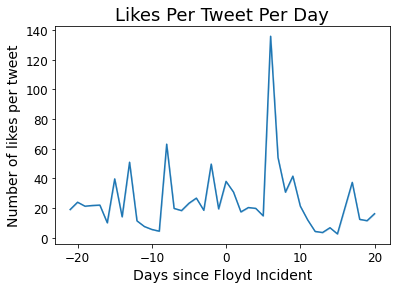

In [69]:
sns.lineplot(data=df, x='days_from_event', y='likes_per_daily_tweets')
plt.title('')
plt.xlabel('Days since Floyd Incident')
plt.ylabel('Number of likes per tweet')
plt.title('Likes Per Tweet Per Day', fontsize='18')

Text(0.5, 1.0, 'Replies Per Tweet Per Day')

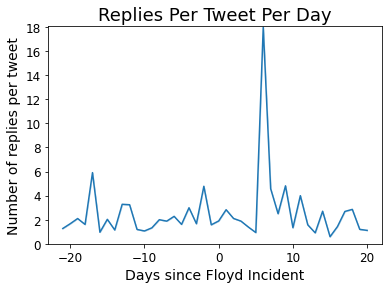

In [206]:
sns.lineplot(data=df, x='days_from_event', y='replies_per_daily_tweets')
plt.title('')
plt.xlabel('Days since Floyd Incident')
plt.ylabel('Number of replies per tweet')
plt.yticks(np.arange(0,18.05,2))
plt.ylim(0, 18.05)
plt.title('Replies Per Tweet Per Day', fontsize='18')

Text(0.5, 1.0, 'Retweets Per Tweet Per Day')

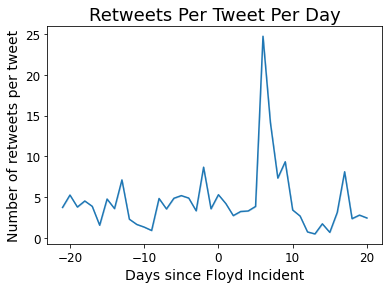

In [71]:
sns.lineplot(data=df, x='days_from_event', y='retweets_per_daily_tweets')
plt.title('')
plt.xlabel('Days since Floyd Incident')
plt.ylabel('Number of retweets per tweet')
plt.title('Retweets Per Tweet Per Day', fontsize='18')

In [110]:
## Likes/Replies/Retweets per follower
# Aggregate at username level

df['user_num_tweets'] = df['tweet_id'].groupby(df['username']).transform('count')

df['likes_per_user'] = df['likes'].groupby(df['username']).transform('sum')
df['replies_per_user'] = df['replies'].groupby(df['username']).transform('sum')
df['retweets_per_user'] = df['retweets'].groupby(df['username']).transform('sum')

df['likes_per_user_tweet'] = df['likes_per_user'] / df['user_num_tweets']
df['replies_per_user_tweet'] = df['replies_per_user'] / df['user_num_tweets']
df['retweets_per_user_tweet'] = df['retweets_per_user'] / df['user_num_tweets']

df['likes_per_follower'] = df['likes_per_user'] / df['user_followers']
df['replies_per_follower'] = df['replies_per_user'] / df['user_followers']
df['retweets_per_follower'] = df['retweets_per_user'] / df['user_followers']

In [111]:
df['likes_per_user_tweet'].groupby(df['ceo_account']).describe()

,count,mean,std,min,25%,50%,75%,max
ceo_account,,,,,,,,
0.0,41322.0,14.210154,68.466140,0.284644,1.541904,3.554062,8.458333,4021.875000
1.0,210.0,1642.419048,2520.971157,48.857143,152.733333,265.177778,1356.411765,8280.266667


In [112]:
df['likes_per_follower'].groupby(df['ceo_account']).describe()

,count,mean,std,min,25%,50%,75%,max
ceo_account,,,,,,,,
0.0,41322.0,0.020003,0.038764,0.000061,0.007325,0.008960,0.015623,0.454571
1.0,210.0,0.136634,0.136477,0.005559,0.018373,0.063919,0.245183,0.376865


In [139]:
df['replies_per_follower'].groupby(df['ceo_account']).describe()

,count,mean,std,min,25%,50%,75%,max
ceo_account,,,,,,,,
0.0,41322.0,0.006518,0.007465,0.000000,0.002398,0.003885,0.006125,0.025126
1.0,210.0,0.004225,0.003701,0.000376,0.000805,0.004996,0.007804,0.013889


<br><br>
As one might imagine, the CEOs in the sample have about 6x higher likes per tweet, when adjusted for number of followers. The companies, on the other hand, have slightly more replies per tweet, adjusted for number of followers.

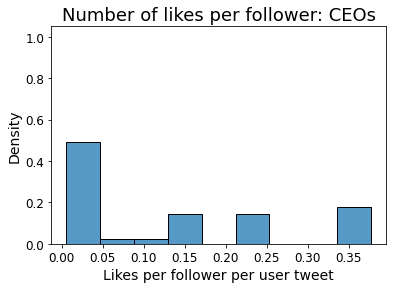

In [201]:
sns.histplot(data=df, x=df['likes_per_follower'][df['ceo_account']==1], stat='probability')
plt.xlabel('Likes per follower per user tweet')
plt.ylabel('Density')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 1.05)
plt.title('Number of likes per follower: CEOs', fontsize=18)
plt.show()

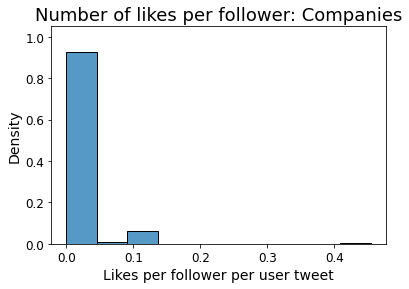

In [199]:
sns.histplot(data=df, x=df['likes_per_follower'][df['ceo_account']==0], stat='probability', bins=10)
plt.xlabel('Likes per follower per user tweet')
plt.ylabel('Density')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 1.05)
plt.title('Number of likes per follower: Companies', fontsize=18)
plt.show()

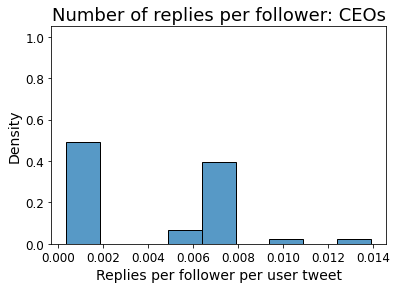

In [200]:
sns.histplot(data=df, x=df['replies_per_follower'][df['ceo_account']==1], stat='probability')
plt.xlabel('Replies per follower per user tweet')
plt.ylabel('Density')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 1.05)
plt.title('Number of replies per follower: CEOs', fontsize=18)
plt.show()

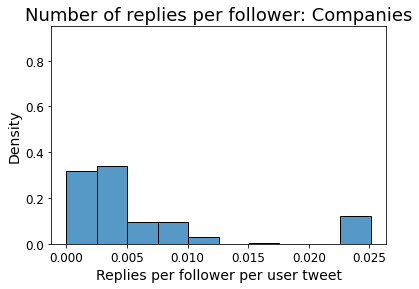

In [138]:
sns.histplot(data=df, x=df['replies_per_follower'][df['ceo_account']==0], stat='probability', bins=10)
plt.xlabel('Replies per follower per user tweet')
plt.ylabel('Density')
plt.ylim(0, 0.95)
plt.title('Number of replies per follower: Companies', fontsize=18)
plt.show()

In [326]:
## Stance tweets per day
df['floyd_action'] = df['floyd_stance'] + df['floyd_followup']
df['user_tweets_by_day'] = df['user_num_tweets'].groupby([df['username'], df['days_from_event']]).transform('count')

df['floyd_action_by_day_ceo'] = df['floyd_action'].groupby([df['days_from_event'], df['ceo_account']]).transform('sum')
df['floyd_action_by_user'] = df['floyd_action'].groupby(df['username']).transform('sum')

df['floyd_ratio_by_day'] = df['floyd_action'] / df['user_tweets_by_day']

In [427]:
#df[['floyd_action', 'floyd_action_by_day_ceo', 'user_tweets_by_day', 'floyd_ratio_by_day', 'username', 'days_from_event']].head(20)

(0.0, 20.0)

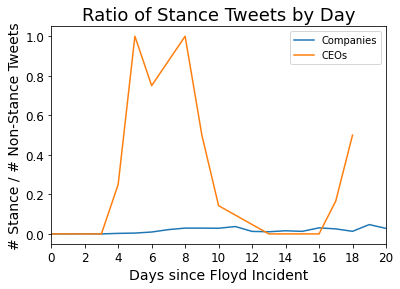

In [412]:
sns.lineplot(data=df, x='days_from_event', y='floyd_action', hue='ceo_account', ci=None)
plt.xlabel('Days since Floyd Incident')
plt.ylabel('# Stance / # Non-Stance Tweets')
plt.title('Ratio of Stance Tweets by Day', fontsize=18)
plt.legend(['Companies', 'CEOs'])
plt.xticks(np.arange(0, 20.5, 2))
plt.xlim(0, 20)

In [398]:
## Likes and replies to stance tweets
# 
df['floyd_action'] = df['floyd_stance'] + df['floyd_followup']
df_stance = df[df['floyd_action']==1]
cols = ['tweet_id', 'floyd_action', 'likes', 'replies', 'retweets', 'days_from_event', 'ceo_account','username']

df_stance = df_stance[cols]
#df_stance['days_from_event'][df['ceo_account']==1].value_counts()
ceo_days_missing = [0, 1, 2, 3, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24]
#df_stance['days_from_event'][df['ceo_account']==0].value_counts()
companies_days_missing = [0, 1, 3, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24]

print(df_stance.shape)
df_tot = pd.DataFrame()
df_app = pd.DataFrame()

ceo_data_list = []
company_data_list = []
for i in ceo_days_missing:
    ceo_data_list.append([str(i)+'ceofill', 0, 0, 0, 0, i, 1, str(i)+'ceouser'])
for i in companies_days_missing:
    company_data_list.append([str(i)+'compfill', 0, 0, 0, 0, i, 0, str(i)+'compuser'])

ceo_data_list.extend(company_data_list)
df_empties = pd.DataFrame(ceo_data_list, columns=cols)
df_empties.head()

(290, 8)


,tweet_id,floyd_action,likes,replies,retweets,days_from_event,ceo_account,username
0,0ceofill,0,0,0,0,0,1,0ceouser
1,1ceofill,0,0,0,0,1,1,1ceouser
2,2ceofill,0,0,0,0,2,1,2ceouser
3,3ceofill,0,0,0,0,3,1,3ceouser
4,11ceofill,0,0,0,0,11,1,11ceouser


In [399]:
df_stance = df_stance.append(df_empties)

In [428]:
df_stance['floyd_actions_by_day_ceo'] = df_stance['floyd_action'].groupby([df_stance['days_from_event'], df_stance['ceo_account']]).transform('sum')
df_stance['likes_by_day_ceo'] = df_stance['likes'].groupby([df_stance['days_from_event'], df_stance['ceo_account']]).transform('sum')
df_stance['replies_by_day_ceo'] = df_stance['replies'].groupby([df_stance['days_from_event'], df_stance['ceo_account']]).transform('sum')


df_stance['total_ceo_comp_tweets'] = df_stance['username'].groupby(df_stance['ceo_account']).transform('count')

#df_stance[['floyd_actions_by_day_ceo', 'total_ceo_comp_tweets', 'floyd_action', 'days_from_event', 'ceo_account', 'username']]

<br><br> 
Companies in this dataset tweeted more stance tweets than CEOs. Adjusted for relative numbers in the dataset, however (about 8 company accounts per CEO account), the number of per-account stances was similar on many days. Interestingly, the mass of CEO stances occurred roughly 6 days after the incident, while company stances tended to persist from 2-3 weeks following the incident. In this case, company twitter accounts may serve as a more natural outlet for consistent stakeholder engagement on political issues than CEO accounts.

Of course, the raw numbers in the first figure and the per-account considerations obscure the fact that companies put out a much larger number of tweets per day than CEOs. On certain days shortly after the incident, the sample CEOs were almost exclusively tweeting about the Floyd incident (as seen in the chart above).

(0.0, 24.0)

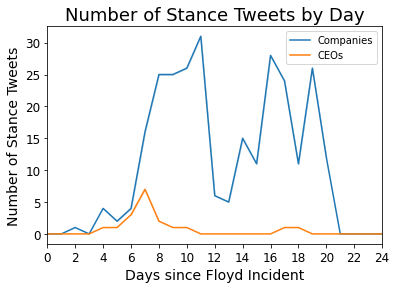

In [413]:
sns.lineplot(data=df_stance, x='days_from_event', y='floyd_actions_by_day_ceo', hue='ceo_account')
plt.xlabel('Days since Floyd Incident')
plt.ylabel('Number of Stance Tweets')
plt.title('Number of Stance Tweets by Day', fontsize=18)
plt.legend(['Companies', 'CEOs'])
plt.xticks(np.arange(0, 24.5, 2))
plt.xlim(0, 24)

<br><br>
Limiting ourselves to just stance tweets, we see more clearly that highly liked individual CEO stances occurred a few days prior to the mass of highly liked corporate stances, which may signal that prominent CEOs made the first move to frame the issue as one that corporate America should address.

Another interesting finding here is that likes and replies on CEO accounts appear to be more driven by individual CEO effects than “time effects”. CEO tweets that garner high numbers of replies are sporadic and spiky. In contrast, the total number of replies to company stance tweets gradually decays over the second and third week following the incident. Interestingly, the large spike in replies on the 6th day following the incident may reflect the growing politicization of demonstrations that had begun that weekend (some of which turned into violent riots). 


(0.0, 24.0)

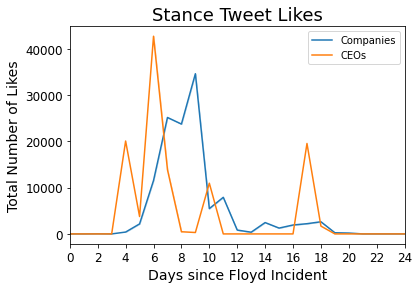

In [423]:
sns.lineplot(data=df_stance, x='days_from_event', y='likes_by_day_ceo', hue='ceo_account', ci=0)
plt.ylabel('Total Number of Likes')
plt.xlabel('Days since Floyd Incident')
plt.title('Stance Tweet Likes', fontsize=18)
plt.legend(['Companies', 'CEOs'])
plt.xticks(np.arange(0, 24.5, 2))
plt.xlim(0, 24)

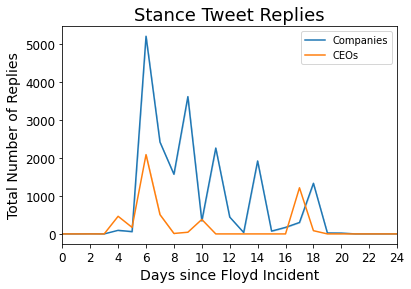

In [424]:
sns.lineplot(data=df_stance, x='days_from_event', y='replies_by_day_ceo', hue='ceo_account', ci=0)
plt.ylabel('Total Number of Replies')
plt.xlabel('Days since Floyd Incident')
plt.xticks(np.arange(0, 24.5, 2))
plt.xlim(0, 24)
plt.title('Stance Tweet Replies', fontsize=18)
plt.legend(['Companies', 'CEOs'])
plt.legend(['Companies', 'CEOs'])